In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import phonopy
THz_to_meV = 4.13567

In [ ]:
root = "../tests/data/Si"

ref_phonon = phonopy.load(f"{root}/phonopy-diag.yaml")
ndsc_phonon = phonopy.load(f"{root}/phonopy.yaml")
ref_phonon.auto_band_structure(npoints=50)
ndsc_phonon.auto_band_structure(npoints=50)

In [ ]:
ref_bands = ref_phonon.get_band_structure_dict()["frequencies"]
nd_bands = ndsc_phonon.get_band_structure_dict()["frequencies"]
ref_qpoints = ref_phonon.get_band_structure_dict()["distances"]
nd_qpoints = ndsc_phonon.get_band_structure_dict()["distances"]
labels = [r"$\Gamma$", "X", "U|K", r"$\Gamma$", "L", "W", "X"]

/Users/ashour/venvs/quesadilla/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesadilla/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesadilla/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesadilla/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesa

Text(0.5, 1.0, 'Si Phonon Band Structure, $4\\times4\\times4$ $q$-grid')

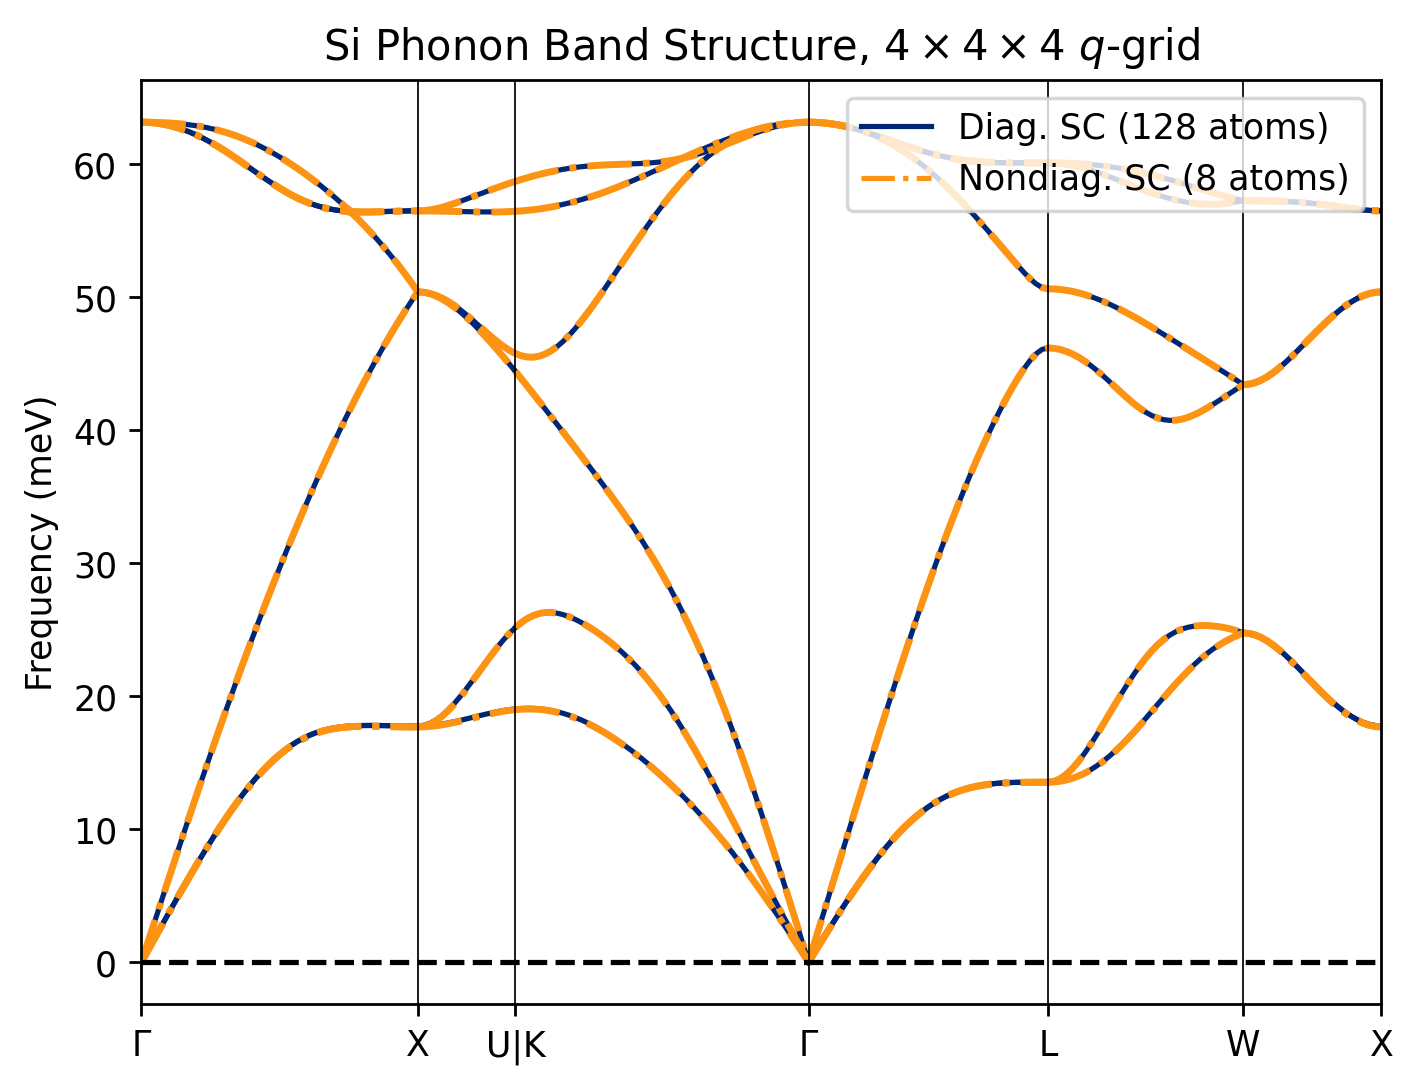

In [29]:
fig, ax = plt.subplots(dpi=250)

for b, q in zip(ref_bands, ref_qpoints):
    ax.plot(q, b * THz_to_meV, "#002676")

label_pos = []
for b, q in zip(nd_bands, nd_qpoints):
    ax.plot(q, b * THz_to_meV, "#FC9313", linestyle="-.", lw=2)
    ax.axvline(q[0], color="k", lw=0.5)
    label_pos.append(q[0])

label_pos.append(q[-1])
ax.set_xticks(label_pos)
ax.set_xticklabels(labels)

ax.axhline(0, color="k", linestyle="--")
ax.set_xlim(np.min(ref_qpoints[0]), np.max(ref_qpoints[-1]))
ax.set_ylabel("Frequency (meV)")

ax.plot([], [], "#002676", label="Diag. SC (128 atoms)")
ax.plot([], [], "#FC9313", linestyle="-.", label="Nondiag. SC (8 atoms)")
ax.legend(loc="upper right")

ax.set_title(r"Si Phonon Band Structure, $4\times4\times4$ $q$-grid")